In [2]:
import cv2
import os as os
from os import listdir
from os.path import isfile, join
import json
import pickle
import torch
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import numpy as np
import torch.nn as nn
import random
import time
from dataset import *
from models import *
import sys

In [3]:
PathA = "./dataset/trainA/"
PathB = "./dataset/trainB/"

In [7]:
def normImg(img):
    return (img / 255 - 0.5) * 2

def backNorm(img):
    return (img / 2 + 0.5) * 255

In [14]:
dataLoaderA = DataLoader()
dataLoaderB = DataLoader()
for i in range(1,100):
    imgA = cv2.imread(PathA + str(i) + "_A.jpg")
    imgB = cv2.imread(PathB + str(i) + "_B.jpg")
    imgA = normImg(imgA)
    imgB = normImg(imgB)
    tensorA = torch.from_numpy(imgA).type(torch.float)
    tensorB = torch.from_numpy(imgB).type(torch.float)
    dataLoaderA.add(tensorA)
    dataLoaderB.add(tensorB)
saveToFile(dataLoaderA, "dataLoaderA.pkl")
saveToFile(dataLoaderB, "dataLoaderB.pkl")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


912

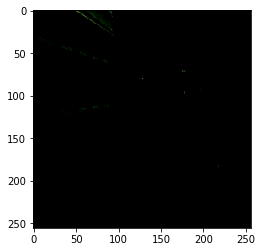

In [15]:
plt.imshow(imgA)
sys.getsizeof(dataLoaderA.storage)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


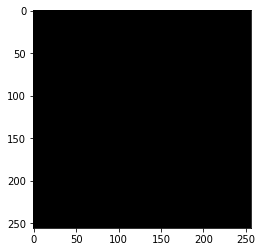

In [16]:
a = dataLoaderB.get()
print()
b = a.view(256,256,3).detach().numpy().astype(np.int)
plt.imshow(b)

In [6]:
a = torch.ones(1,3,256,256)
model = PatchGAN()
b = model(a)
b.mean()

tensor(0.4842, grad_fn=<MeanBackward1>)

In [7]:
c = []
for x in [i for i in range(1,70)]:
    b = 69
    iter = 0
    while b < 255:
        b += x
        iter += 1
    if b == 255:
        c.append((x, iter))
c

[(1, 186), (2, 93), (3, 62), (6, 31), (31, 6), (62, 3)]